# Project: Investigate No-Show Medical Appointment Dataset 


## Introduction

The No-show Appointments dataset will be the focus of this study. It comprises a 100k-recorded database of medical appointments in Brazil, with the major focus on whether or not the patient showed up for the appointment. We'll look into no-show tendencies and other related characteristics.
- PatientId: Identification number for each patient.
- AppointmentID: Identification number for each appointment made.
- Gender: Is the patient Male or Female.
- ScheduledDay: The day someone registered/called to make the appointment.
- AppointmentDay: The actual day the patient has to visit the doctor.
- Age: How old the patient is.
- Neighbourhood: The location of the hospital/clinic.
-  Scholarship: whether or not the patient is enrolled in a Brasilian welfare program that provides financial aid. 0 or 1 for no or yes. 
- Hypertension: 0 or 1 for no or yes.
- Diabetes: 0 or 1 for no or yes.
- Handicap: 0 or 1 for no or yes.
- SMS_received: If messages were sent to the patient for a reminder. 0 or 1 for no or yes.
- No-show: Whether the patient made it to the appointment or not. Yes for no-show, No for showing up.

## Questions
1. What percentage missed their appointment?
2. How many people received SMS?
3. How many male and female missed their appointment?


## Data Wrangling

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1]:
#reading data
df=pd.read_csv("noshowappointments-kagglev2-may-2016 (1).csv", parse_dates = ["AppointmentDay", "ScheduledDay"])



NameError: name 'pd' is not defined

In [4]:
# checking the first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# checking data information
df.info()

NameError: name 'df' is not defined

In [5]:
# checking for missing values
df.isna ().sum ()

NameError: name 'df' is not defined

In [7]:
# checking for duplicate
df.duplicated ().sum ()

0

In [8]:
# checking for summary statistics
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Observations**
- I noticed that there is a value of -1 in the age column which is abnormal
- I noticed that the PatientID and AppointmentID are in float and integer formats instead of object format
- I noticed that there are no duplicate data
- I noticed that there are no missing values
- I noticed that Hipertension, Diabetes, Alcoholism, handicap and SMS received are in integers instead of string.
### Data Cleaning (Replace this with more specific notes!)

In [9]:
# fetching the observation that has the age of -1.
df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
#checking the index
df.query('Age==-1').index

Int64Index([99832], dtype='int64')

In [11]:
#deleting the observation that has age of -1.
df.drop(df.query('Age==-1').index, inplace=True)

In [12]:
#confirming that that the observation has been dropped.
df.query('Age==-1')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [13]:
# to write a function that will convert any data type to string
def convert_dtype(new_dtype, data, features):
    '''this function is used to change any data type to another data type
    old_dtype:string
    new_dtype:string
    data:DataFrame
    features:list '''
    
    
    for x in features:
        df[x] = df[x].astype(new_dtype)
        

In [14]:
features = ["PatientId", "AppointmentID", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received", "No-show" ]
convert_dtype('str', df, features)

In [15]:
#checking if a data type has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  object             
 1   AppointmentID   110526 non-null  object             
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  object             
 8   Hipertension    110526 non-null  object             
 9   Diabetes        110526 non-null  object             
 10  Alcoholism      110526 non-null  object             
 11  Handcap         110526 non-null  object             
 12  SMS_received    110526 non-null  object             
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  What percentage missed their appointment?

In [16]:
#checking for the percentage of those that missed their appointment.
No_show_percent=round(df["No-show"].value_counts()/len(df)*100)
No_show_percent

No     80.0
Yes    20.0
Name: No-show, dtype: float64

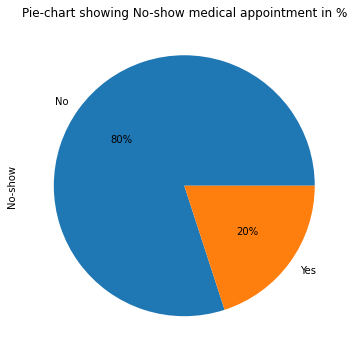

In [17]:
#plotting a pie-chart to show the percentage.
No_show_percent.plot(kind="pie", autopct="%1.0f%%", figsize=(6,6))
plt.title('Pie-chart showing No-show medical appointment in %');

**Observation**
I noticed that 20% of the patients did not show up for the medical appointment while 80% showed up.

### How many people received SMS?

In [18]:
#checking for how many people received SMS.
SMS_received=round(df["SMS_received"].value_counts())
SMS_received

0    75044
1    35482
Name: SMS_received, dtype: int64

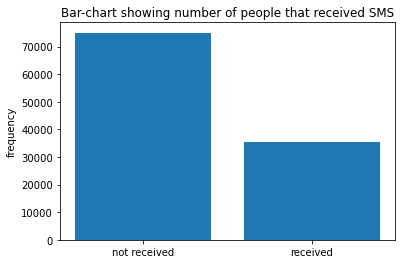

In [19]:
#plotting of bar-chart to represent people that received SMS.
plt.bar([0,1], SMS_received, tick_label=['not received', 'received'])
plt.ylabel("frequency")
plt.title('Bar-chart showing number of people that received SMS');

**Observation**
It was noticed that people that received SMS were 75044 while those that did not receive are 35482.

## How many male and female missed their appointment?


In [20]:
#trying to know how many people missed their appointment.
Gender=df["Gender"].groupby(df["No-show"]).value_counts().unstack()
Gender

Gender,F,M
No-show,,
No,57245,30962
Yes,14594,7725


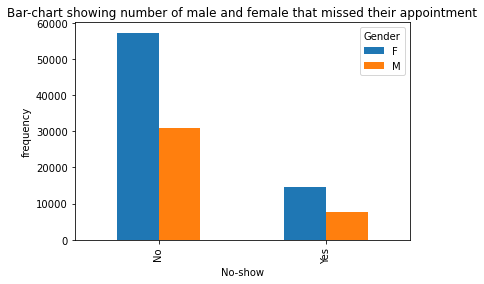

In [21]:
#plotting of bar-chart to show both genders that missed their appointment.
Gender.plot(kind='bar')
plt.ylabel("frequency")
plt.title('Bar-chart showing number of male and female that missed their appointment');

**Observation**
The number of male and female that did not show up for their medical appointments are 7725 and 14594 respectively.

<a id='conclusions'></a>
## Conclusion
- I noticed that 20% of the patients did not show up for the medical appointment while 80% showed up.
- It was noticed that people that received SMS were 75044 while those that did not receive are 35482.
- The number of male and female that did not show up for their medical appointments are 7725 and 14594 respectively.

## Limitations
- The data collected was only from Brazil and observations may vary based on different countries.
- All observations are tentative.
